## 1. Importing the required libraries

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## 2. Loading the data into the data frame.

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Data Visualization and Exploration and  Data Pre-processing and cleaning





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#finding Number of Unique Values in each Feature.
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#Removing the columns of "Rownumber", "CustomerId", "Surname" from the dataset since they do NOT have any value to the classification analysis.
df.drop('RowNumber',axis='columns',inplace=True)
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)

In [ ]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print("------Stats for the whole dataset--------")
df.describe()

------Stats for the whole dataset--------


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#Balance Stats based on Exited and Non-Exited
Not_Exited=df[df.Exited==0]
Exited=df[df.Exited==1]

In [ ]:
Not_Exited.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7963.000000,7.963000e+03,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,2891.682053,7.174423e+04,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,2.000000,1.556570e+07,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,2526.500000,1.562882e+07,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,5042.000000,1.569154e+07,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,7525.500000,1.575335e+07,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


In [ ]:
Exited.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000000,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,2866.855245,7.269262e+04,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,2419.000000,1.562736e+07,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,4871.000000,1.568896e+07,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,7404.000000,1.575309e+07,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,9999.000000,1.581566e+07,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


### 3.1 Perform Below Visualizations.
● Univariate Analysis

● Bi - Variate Analysis






[]

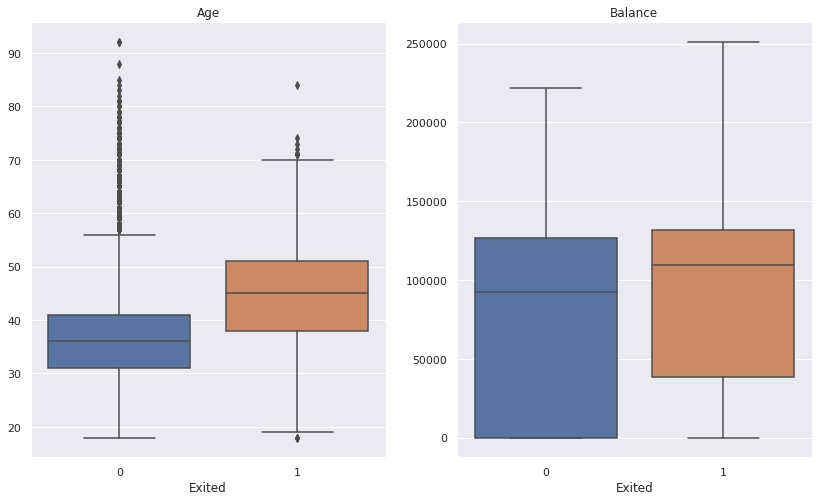

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,8))
valid_col = ['Age', 'Balance']
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.boxplot(x='Exited', y=valid_col[i], data=df, ax=ax)
    ax.set_ylabel(None)
    ax.set_title(label=valid_col[i])
plt.plot()

#### Observation on Statistical Data with Exit and Non Exit parameters

- For the stats with exit and non-exit parameters, we can arrive at 
some inferences.

- Looking at the box pot for Age and Balance with exit and non-exit at x-axis, we can infer that people with higher age have exited the most and with higher Balance in their accounts are also exited too.

- All other variables (other than categorical), provide similar stat values for exited vs non-exited.



 


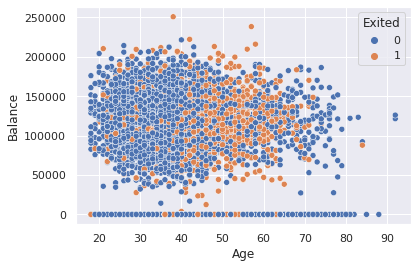

In [ ]:
sns.scatterplot(data=df, x="Age", y="Balance", hue="Exited")


### **Some Univariate Analysis to understand Value counts using countplot.**



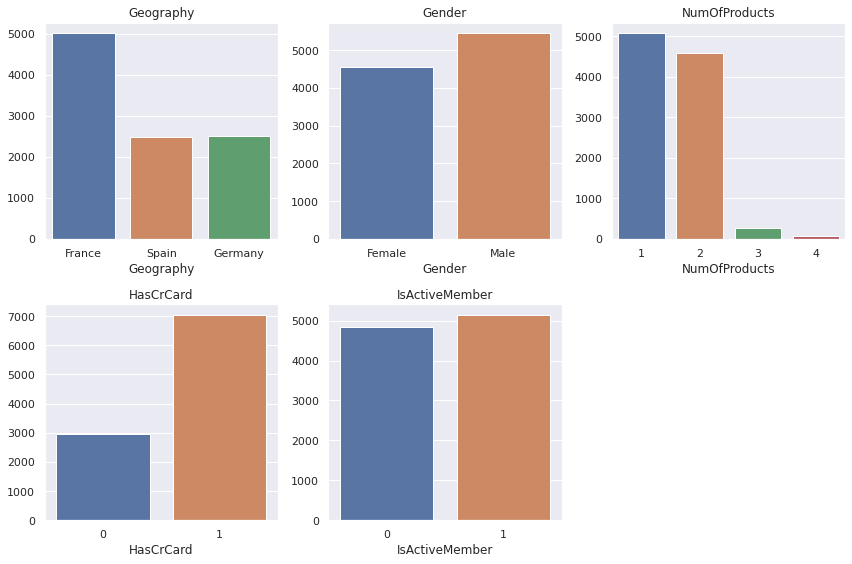

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(12,8))
valid_col =['Geography', 'Gender',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.countplot(data=df,x=valid_col[i],ax=ax)
    ax.set_ylabel(None)
    ax.set_title(label=valid_col[i])
plt.tight_layout()

### Observation from Univariate Analysis

- Most of the Customers are located in france
- Male customers are higher than that of Female customers
- Active and In Active members are more or less equal
- Most of the Customers own a credit card
- Most of the Customers atleast use 1 or 2 products from the bank

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

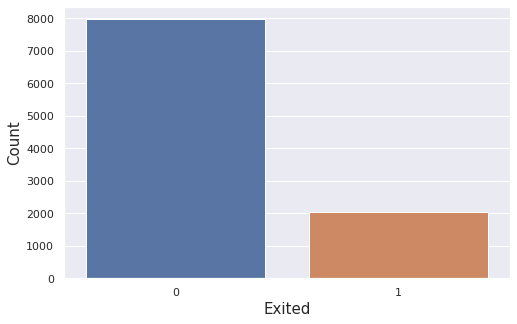

In [ ]:
#Looking at the Value counts for the Target Variable
lbl = df.Exited.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(lbl.index, gender_lbl)
plt.xlabel('Exited', fontsize=15)
plt.ylabel('Count', fontsize=15)

#### Observattion:
- We can see there is an imbalance in the dataset.From the above barchart, we can see the imabalance clearly.

### Bivariate Analysis to understand each categorical variables relation with target variable (Exited)

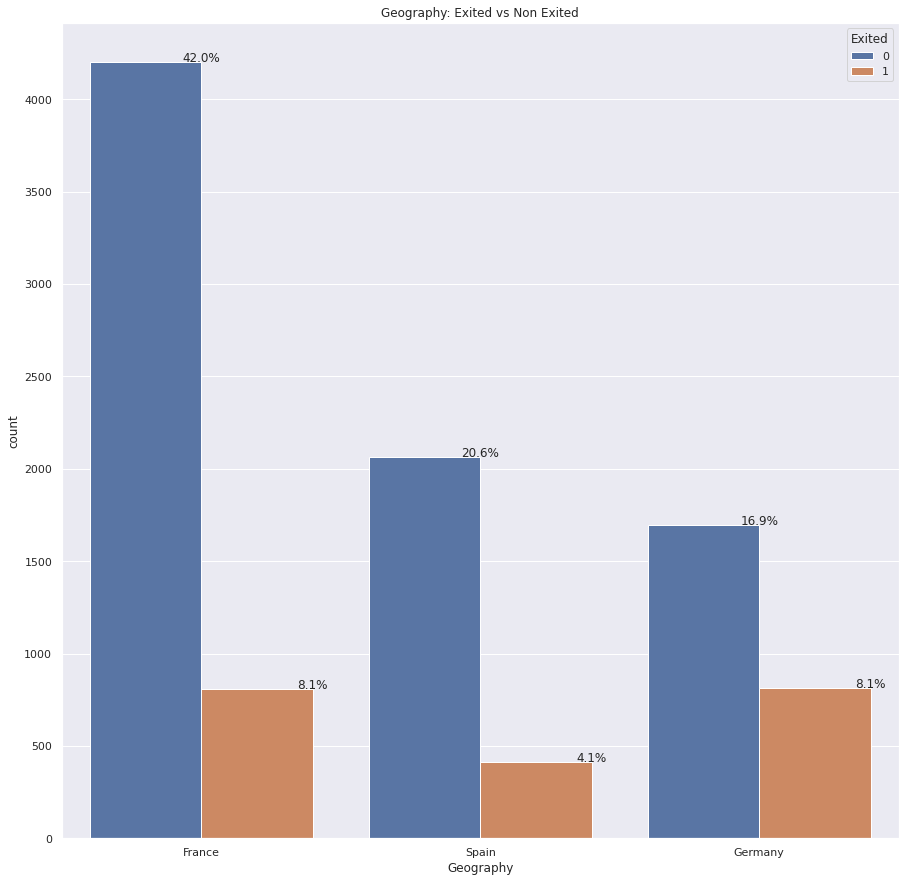

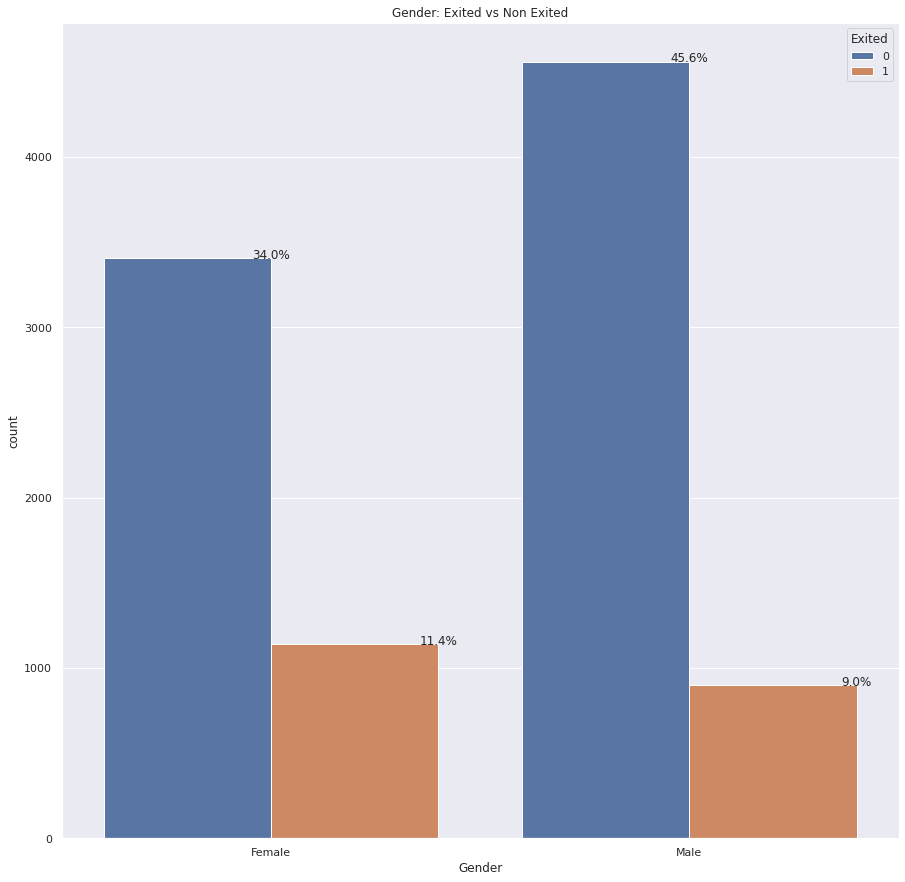

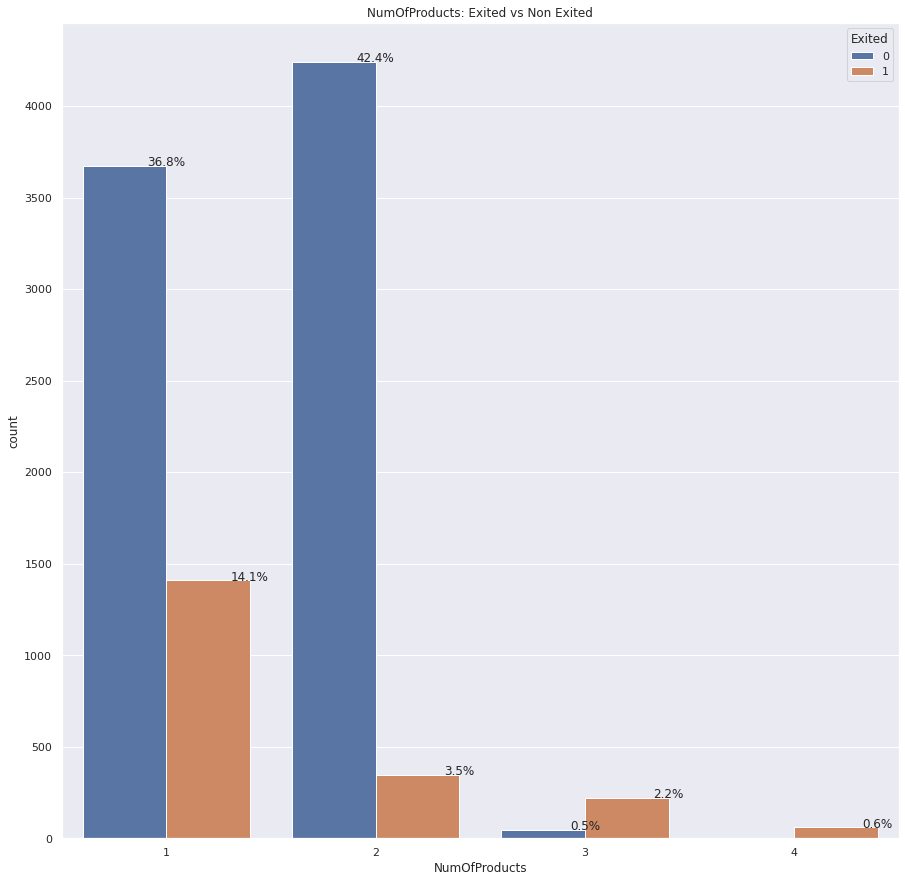

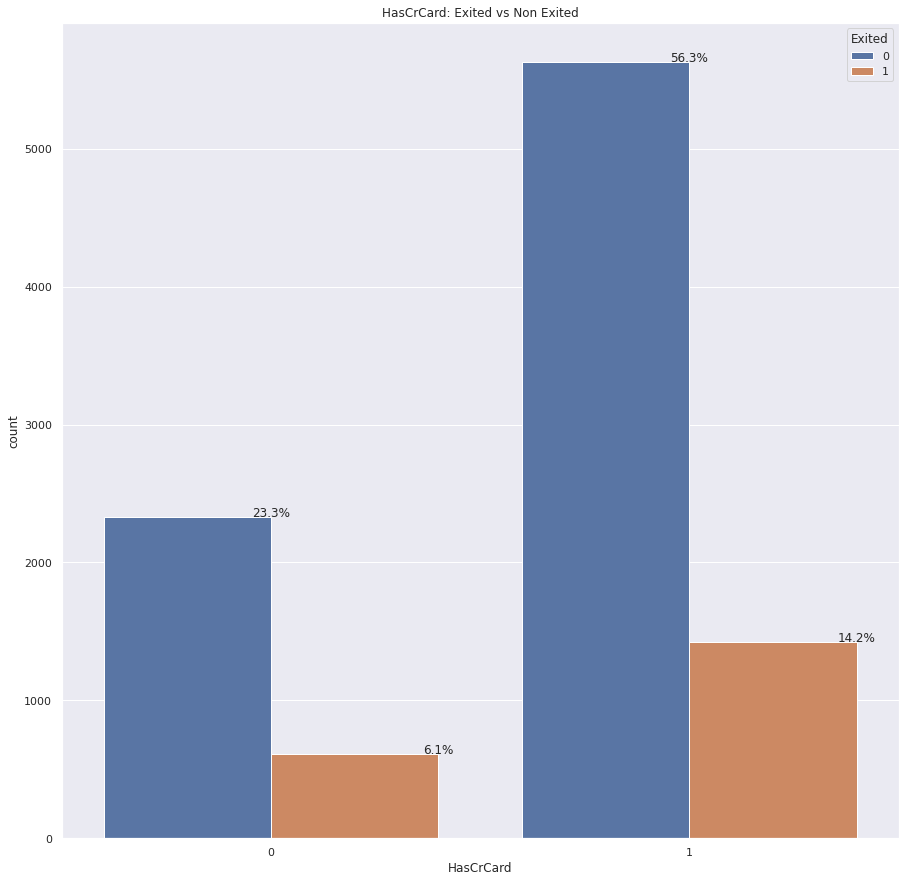

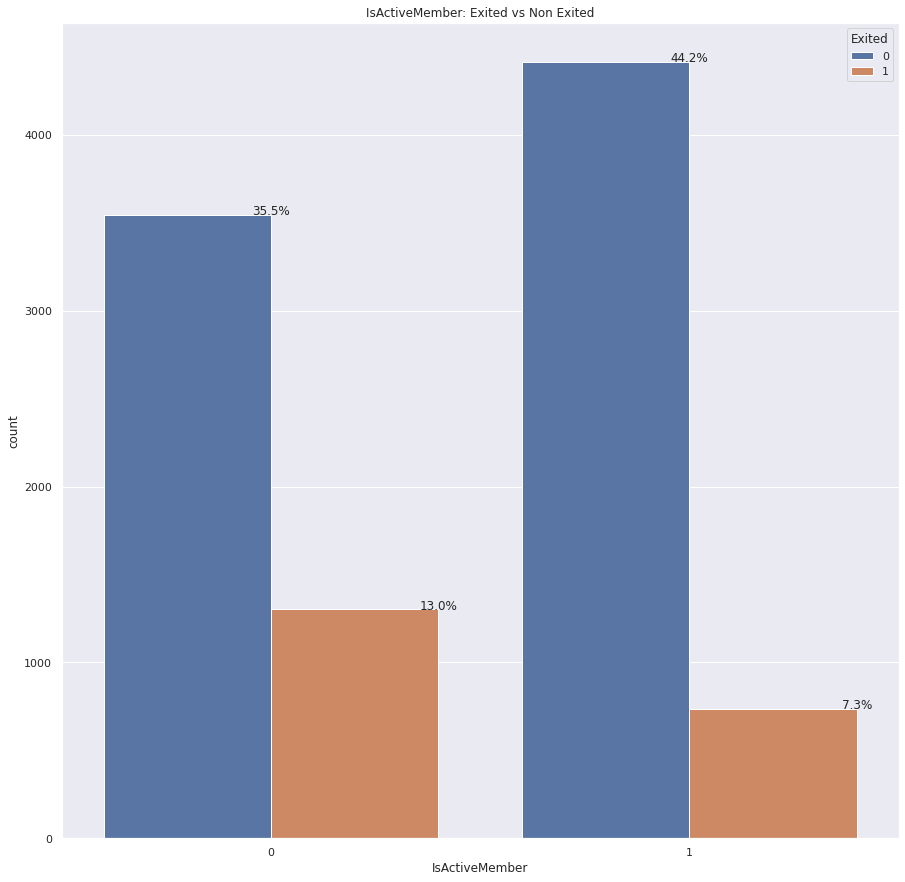

In [ ]:
total=float(len(df))
Excepted_col=['Tenure','Age','CreditScore','Balance',"EstimatedSalary"]
Accepted_col=['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']
for column in Accepted_col:
    fig, ax = plt.subplots(figsize=(15,15))
    sns.countplot(data=df,x=column,hue='Exited',ax=ax)
    ax.set_title(column+': Exited vs Non Exited')
    ax.set_ylabel('count')
    for i in ax.patches:
        percent = '{:.1f}%'.format(100 * i.get_height()/total)
        x=i.get_x() + i.get_width()
        y=i.get_height()
        ax.annotate(percent,(x,y),ha='center')
    plt.show()

#### Observation from Bivariate Analysis - Catergorical

- 42% People who are located in France havent exited compared to other countries.
- The churn % of Females are higher than Males
- Customers who use more than 2 products are less possible to exit
- Most of the customers who exit are inactive members
- Most of the customers who exit have a credit card

### **Bivariate Analysis to understand each Numerical variables relation with target variable (Exited)**

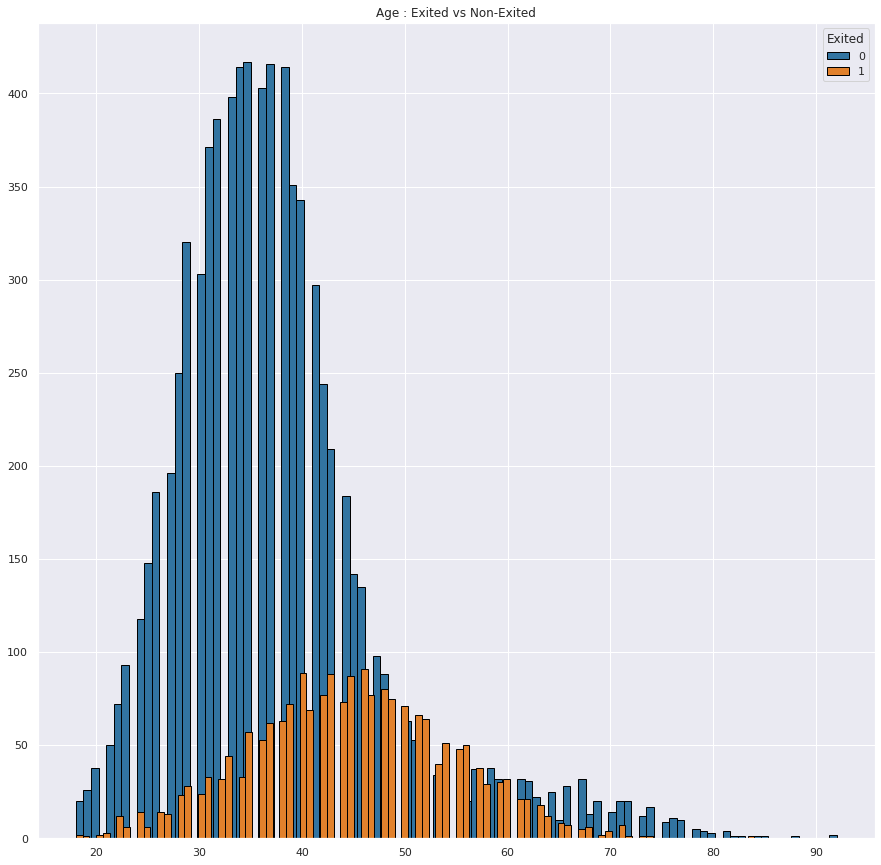

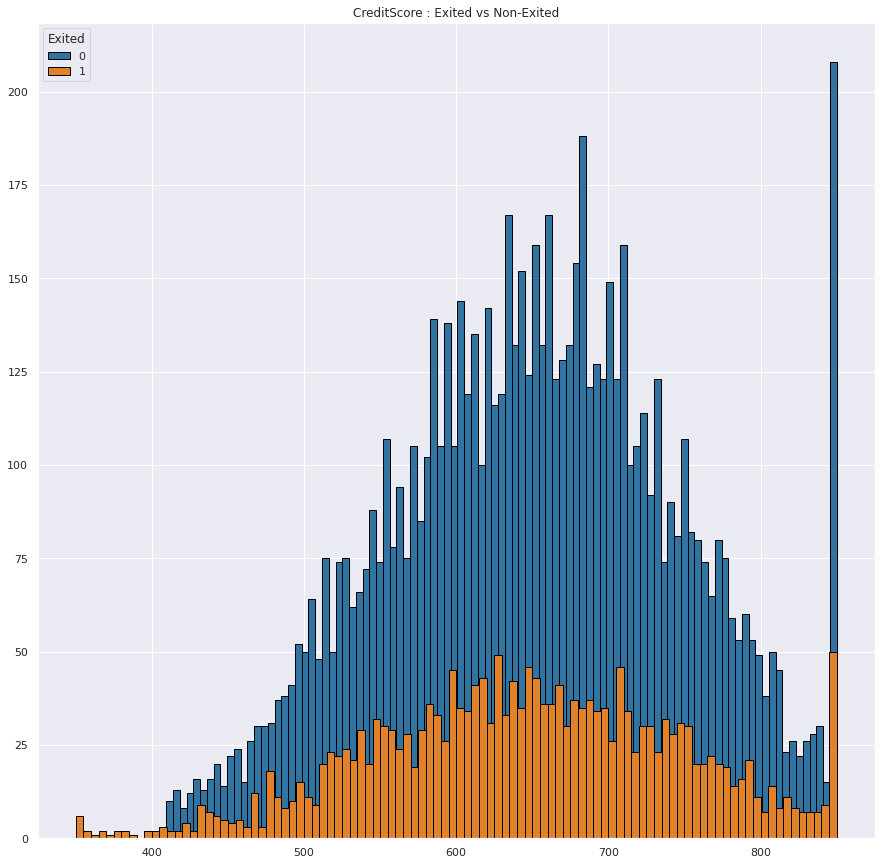

In [ ]:
df_exited=df[df['Exited']==1]
df_not_exited=df[df['Exited']==0]
Excepted_col=['Age','CreditScore']
for column in Excepted_col:
    plt.figure(figsize=(15,15))
    plt.hist(x=column,bins=100,data=df_not_exited,edgecolor='black',color='#3274a1')
    plt.hist(x=column,bins=100,data=df_exited,edgecolor='black',color='#e1812c')
    plt.title(column+' : Exited vs Non-Exited')
    plt.legend([0,1],title='Exited')

#### Observation from Bivariate Analysis - Numerical

- Most of the people from Age 40 and above are exiting from the bank.
- From the boxplot visualized before, we can say that, customers who have more bank balance is exiting more.

### 3.2 Handling Missing Values

In [ ]:
Total = df.isnull().sum().sort_values(ascending = False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0
HasCrCard,0,0.0
IsActiveMember,0,0.0
EstimatedSalary,0,0.0


#### Observation:
- There is no missing value in this data-set

In [ ]:
#Using get_dummies for data manipulation of categorical variables.
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'],drop_first=True)
df_encoded.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [ ]:
#Using Min-Max Scaler, scaling the numerical variables.
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
scaler = MinMaxScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

In [ ]:
#Checking the values after encoding and scaling.
for col in df_encoded:
    print(f'{col}: {df_encoded[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [ ]:
#Taking Target variable as "y" and all others as "X".
X = df_encoded.drop('Exited',axis='columns')
y = df_encoded['Exited']

In [ ]:
#For Balancing the dataset, we use SMOTE - an oversampling technique.
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

#y_sm.value_counts()
X_sm.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,0,0,0
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,1,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,0,0,0
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,1,0


In [ ]:
X_sm.shape

(15926, 11)

In [ ]:
y_sm.shape


(15926,)

In [ ]:
df_bal_smote = pd.concat([X_sm, y_sm], axis=1)
df_bal_smote.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,0,0,0,1
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,1,0,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,0,0,0,1
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,1,0,0
5,0.590,0.351351,0.8,0.453394,2,1,0,0.748797,0,1,1,1
6,0.944,0.432432,0.7,0.000000,2,1,1,0.050261,0,0,1,0
7,0.052,0.148649,0.4,0.458540,4,1,0,0.596733,1,0,0,1
8,0.302,0.351351,0.4,0.566170,2,0,1,0.374680,0,0,1,0
9,0.668,0.121622,0.2,0.536488,1,1,1,0.358605,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

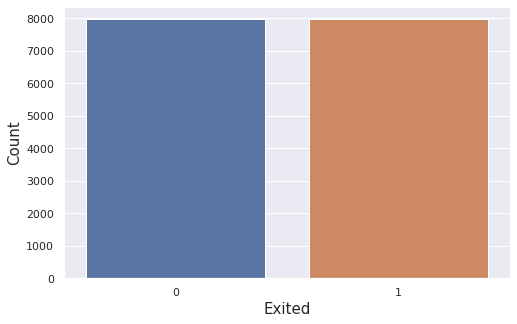

In [ ]:
#plotting again the balanced dataset
lbl = df_bal_smote.Exited.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(lbl.index, lbl)
plt.xlabel('Exited', fontsize=15)
plt.ylabel('Count', fontsize=15)

- Now, we have blanced data-set

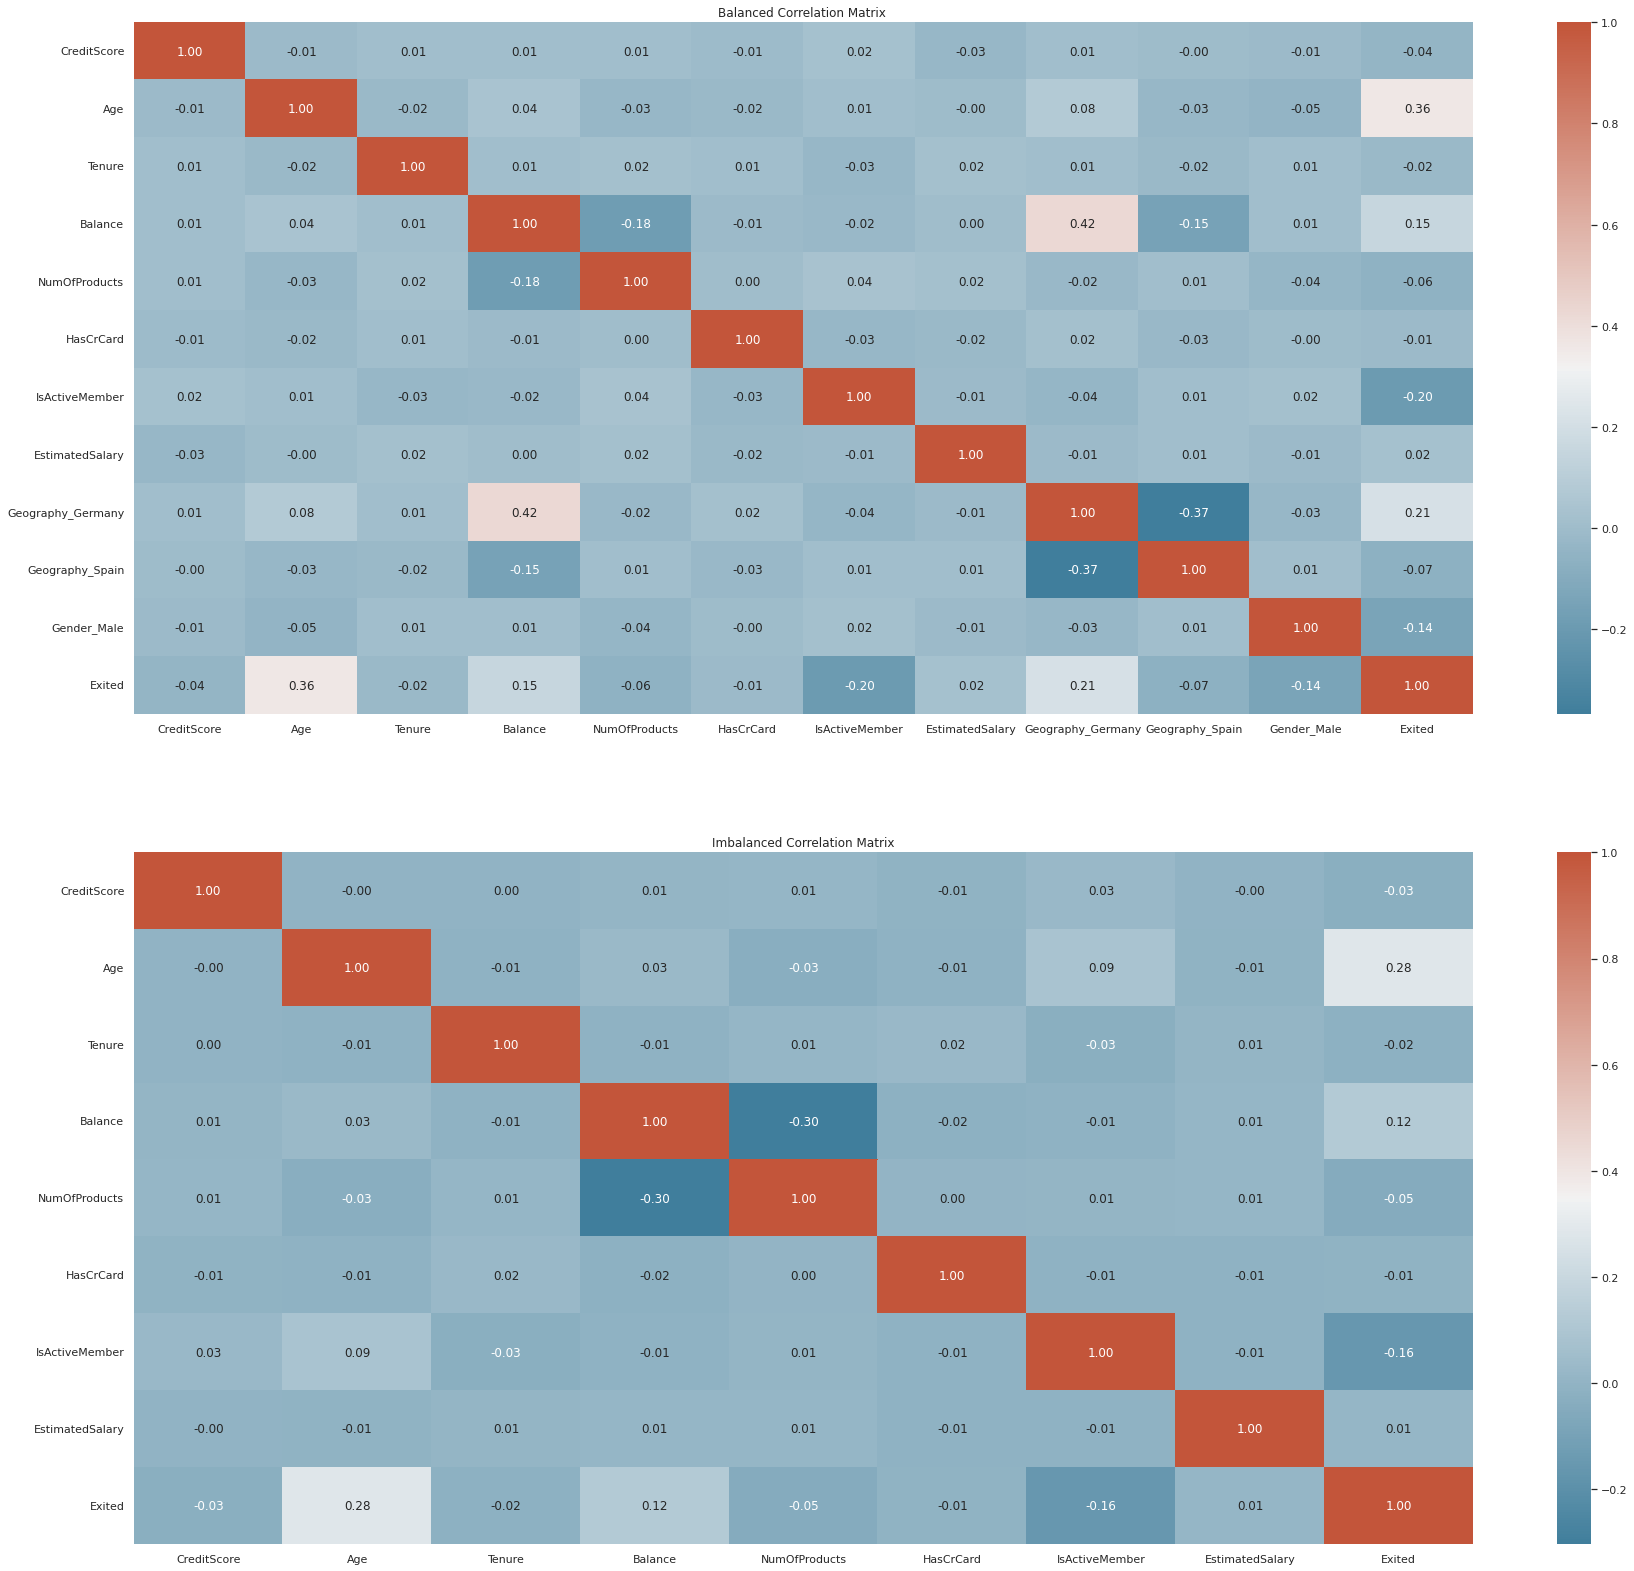

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(30,28))

cmap=sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(df_bal_smote.corr(), annot=True, fmt=".2f", cmap = cmap, ax=axes[0])
axes[0].set_title("Balanced Correlation Matrix ",fontweight='light')

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap = cmap, ax=axes[1])
axes[1].set_title('Imbalanced Correlation Matrix', fontweight='light')

plt.show()

#### Observation on the above Correlation
- The imbalanced dataset shows not much of correlation between the features and with class variable.
- The balanced dataset shows some greater correlation after scaling the features. We find that Age and Balance shows positive correlation with class variable. So we consider these features as influencers.

[]

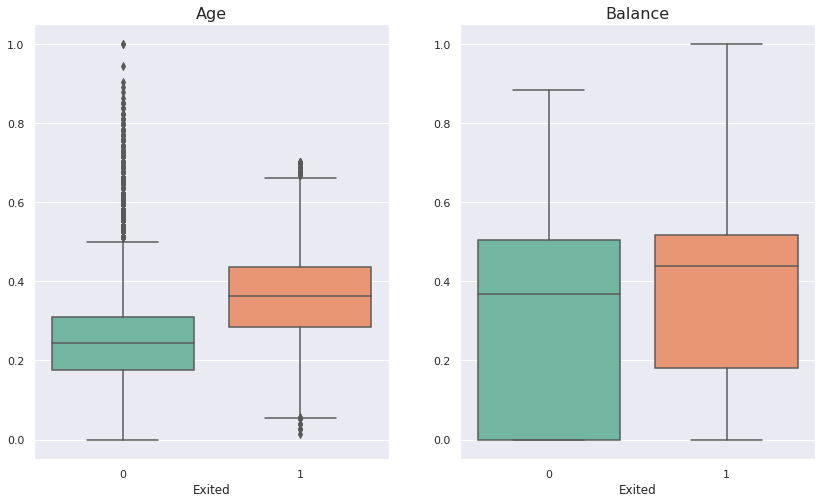

In [ ]:
#Check for outliers for the influenced features (Age and Balance)

fig, axes = plt.subplots(1,2,figsize=(14,8))

high_correlation = ['Age', 'Balance']

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.boxplot(x='Exited', y=high_correlation[i], data=df_bal_smote, ax=ax, palette=sns.color_palette('Set2', 2))
    ax.set_ylabel(None)
    ax.set_title(label=high_correlation[i], fontsize=16, fontweight='light')
plt.plot()

#### Observation:
- As we can see there are outliers at both the ends of the Age boxplot. So removing them from our dataset

Here we remove the data points which lies above Q75 + 1.5 IQR and below Q25+ 1.5IQR .

In [ ]:
v_fraud = df_bal_smote[df_bal_smote['Exited']==1]['Age']

q75 = np.percentile(v_fraud, 75)
q25 = np.percentile(v_fraud, 25)
iqr = q75 - q25

v_lower, v_upper = q25-1.5*iqr, q75+1.5*iqr
outliers = [x for x in v_fraud if x > v_upper or x < v_lower]

print(str(len(outliers))+' '+str('Age')+' fraud outliers: '+str(outliers)+'\n')

df_bal_smote = df_bal_smote.drop(df_bal_smote.index[df_bal_smote['Age'].isin(outliers) & 
                                 df_bal_smote['Exited']==1])

40 Age fraud outliers: [0.05405405405405404, 0.6891891891891891, 0.04054054054054051, 0.02702702702702702, 0.05405405405405404, 0.05405405405405404, 0.05405405405405404, 0.05405405405405404, 0.02702702702702702, 0.7027027027027027, 0.7027027027027027, 0.013513513513513539, 0.6756756756756755, 0.7027027027027027, 0.05405405405405404, 0.6756756756756755, 0.05405405405405404, 0.6756756756756755, 0.05405405405405404, 0.05405405405405404, 0.05405405405405404, 0.04054054054054051, 0.6756756756756755, 0.6756756756756755, 0.04054054054054051, 0.6756756756756755, 0.05405405405405404, 0.05405405405405404, 0.7027027027027027, 0.6891891891891891, 0.670224695358153, 0.6970345039336239, 0.6678976062581231, 0.6842629082722711, 0.05483989384354189, 0.02740838502840478, 0.6893496352438847, 0.6685735018487272, 0.6957002367305071, 0.6781374074138865]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

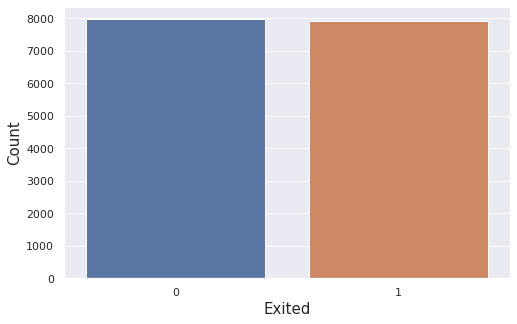

In [ ]:
#plotting again the balanced dataset after removing outliers
lbl = df_bal_smote.Exited.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(lbl.index, lbl)
plt.xlabel('Exited', fontsize=15)
plt.ylabel('Count', fontsize=15)

#  4.Split the data into dependent and independent variables.

In [ ]:
X = df_bal_smote.drop('Exited',axis='columns')
y = df_bal_smote['Exited']

In [ ]:
#Using Train test split function, we split the balanced (SMOTE) data into training (80%) and testing data (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)